<a href="https://colab.research.google.com/github/costpetrides/Computational-Physics/blob/main/Roots%20Finding/Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 3.1

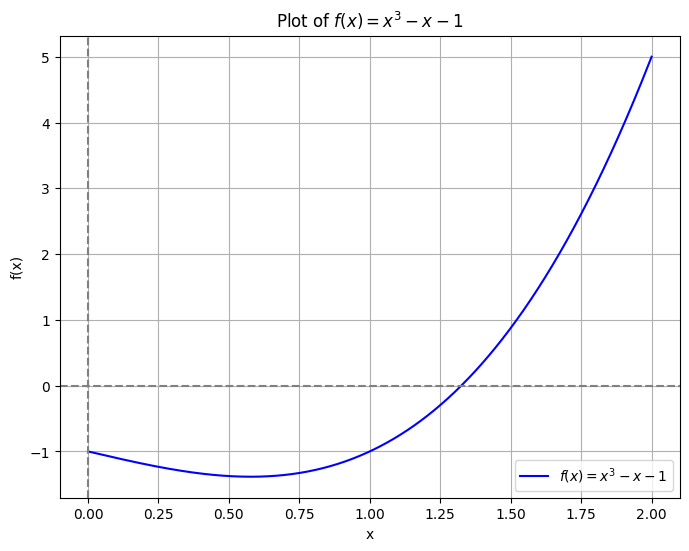

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**3 - x - 1

# Generate x values
x = np.linspace(0, 2, 1000)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, f(x), label='$f(x) = x^3 - x - 1$', color='b')

# Add horizontal and vertical lines at x=0 and y=0
plt.axhline(y=0, linestyle='--', color='gray')
plt.axvline(x=0, linestyle='--', color='gray')

# Add labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of $f(x) = x^3 - x - 1$')
plt.legend()

# Add grid
plt.grid(True)

# Show the plot
plt.show()

# i. Bisection

Bisection: x = 1.324718
N = 22


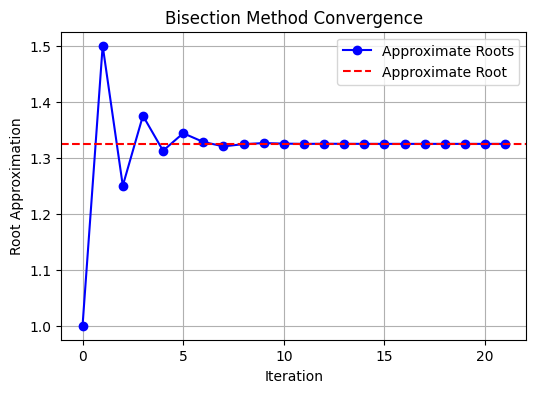

In [7]:
# Bisection method
a = 0
b = 2
bis = []
tolerance = 1.e-6  # This is a  threshold value used to determine when to stop the iteration !
N = 1000

for i in range(N):
    c = (a + b) / 2
    bis.append(c)

    if f(a) * f(c) < 0:
        b = c
    else:
        a = c

    if abs(f(c)) < tolerance:
        break

# Results
N = len(bis)
root = bis[-1]

print('Bisection: x = %.6f' % root)
print('N = %.f' % N)

# Plotting the results
plt.figure(figsize=(6, 4))
plt.plot(bis, marker='o', linestyle='-', color='b', label='Approximate Roots')
plt.axhline(y=root, color='red', linestyle='--', label='Approximate Root')
plt.xlabel('Iteration')
plt.ylabel('Root Approximation')
plt.title('Bisection Method Convergence')
plt.legend()
plt.grid(True)
plt.show()


# ii. Regula Falsi - False Position method

Regula Falsi: x = 1.324718
N = 20


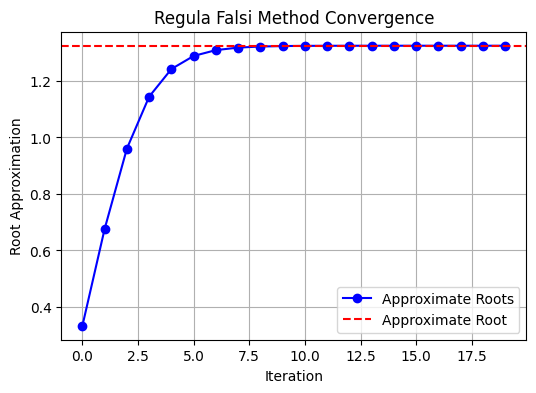

In [11]:
def regula_falsi(a, b, tol=1.e-6, N=1000): # function !
    # Check initial bracketing
    if f(a) * f(b) >= 0:
        raise ValueError("The function must have opposite signs at the endpoints a and b.")

    reg = []
    for _ in range(N):
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        reg.append(c)

        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

        if abs(f(c)) < tol:
            break

    return c, reg # Note that the function returns the c: approximation and reg: a list that stores the sequence !

# Define interval and tolerance
a = 0
b = 2
tolerance = 1.e-6

# Here we call our regula_falsi  function :)
root, reg = regula_falsi(a, b, tol=tolerance)

# Results
N = len(reg)

print('Regula Falsi: x = %.6f' % root)
print('N = %.f' % N)

# Plotting the results
plt.figure(figsize=(6, 4))
plt.plot(reg, marker='o', linestyle='-', color='b', label='Approximate Roots')
plt.axhline(y=root, color='red', linestyle='--', label='Approximate Root')
plt.xlabel('Iteration')
plt.ylabel('Root Approximation')
plt.title('Regula Falsi Method Convergence')
plt.legend()
plt.grid(True)
plt.show()


# iii. Newton Raphson

Newton-Raphson: x = 1.324718
N = 3


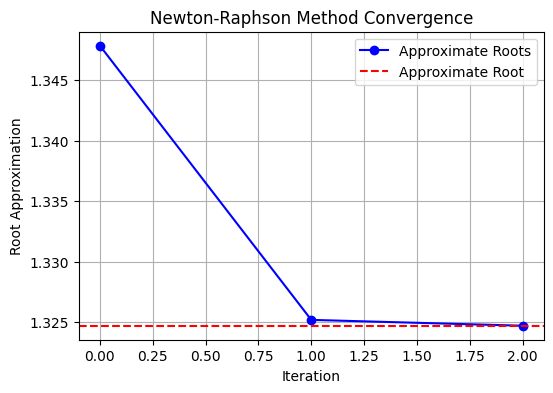

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return x**3 - x - 1

def df(x):
    return 3*x**2 - 1

# Newton-Raphson function !
def newton_raphson(x0, tol=1.e-6, max_iterations=1000):
    new = []  # Initialize list to store approximations
    x = x0    # Starting point

    for _ in range(max_iterations):
        x = x - (f(x) / df(x))
        new.append(x)

        if abs(f(x)) < tol:
            break

    return x, new

# Initial guess...
x0 = 1.5
tolerance = 1.e-6

# Call  Newton-Raphson function
root, new = newton_raphson(x0, tol=tolerance)

# Results
N = len(new)

print('Newton-Raphson: x = %.6f' % root)
print('N = %.f' % N)

# Plotting the results
plt.figure(figsize=(6, 4))
plt.plot(new, marker='o', linestyle='-', color='b', label='Approximate Roots')
plt.axhline(y=root, color='red', linestyle='--', label='Approximate Root')
plt.xlabel('Iteration')
plt.ylabel('Root Approximation')
plt.title('Newton-Raphson Method Convergence')
plt.legend()
plt.grid(True)
plt.show()


# iv. Secant

Secant: x = 1.324718
N = 4


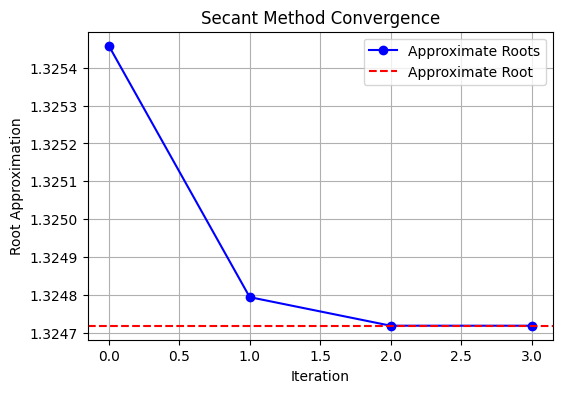

In [15]:

def secant_method(x0, x1, tol=1.e-7, max_iterations=100):
    sec = []  # Initialize list to store approximations

    for _ in range(max_iterations):
        # Compute the next approximation
        x2 = x1 - (x1 - x0) * f(x1) / (f(x1) - f(x0))
        sec.append(x2)

        # Check if the approximation is within the tolerance
        if abs(f(x2)) < tol:
            break

        # Update for next iteration
        x0, x1 = x1, x2

    return x2, sec

# Initial guesses
x0 = 1.332
x1 = 1.443242
tolerance = 1.e-7

# Perform Secant method
root, sec = secant_method(x0, x1, tol=tolerance)

# Results
N = len(sec)

print('Secant: x = %.6f' % root)
print('N = %.f' % N)

# Plotting the results
plt.figure(figsize=(6, 4))
plt.plot(sec, marker='o', linestyle='-', color='b', label='Approximate Roots')
plt.axhline(y=root, color='red', linestyle='--', label='Approximate Root')
plt.xlabel('Iteration')
plt.ylabel('Root Approximation')
plt.title('Secant Method Convergence')
plt.legend()
plt.grid(True)
plt.show()


# v. Fixed Point

Fixed Point: x = 1.324718
N = 9


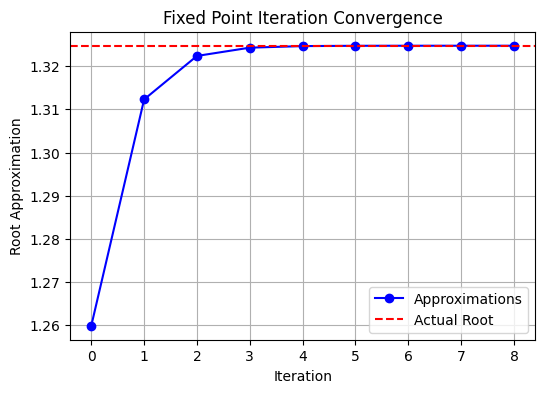

In [17]:
# Define the fixed-point iteration function
def g(x):
    return (x + 1)**(1/3)

# Fixed-point iteration method
def fixed_point_iteration(x0, tol=1.e-6, max_iterations=100):
    fix = []  # Initialize list to store approximations
    x = x0    # Starting point

    for _ in range(max_iterations):
        x = g(x)
        fix.append(x)

        # Check if the function value is within the tolerance
        if abs(f(x)) < tol:
            break

    return x, fix

# Initial guess...
x0 = 1
tolerance = 1.e-6

# Call the Fixed-point iteration function
root, fix = fixed_point_iteration(x0, tol=tolerance)

# Results
N = len(fix)

print('Fixed Point: x = %.6f' % root)
print('N = %.f' % N)

# Plotting the results
plt.figure(figsize=(6, 4))
plt.plot(fix, marker='o', linestyle='-', color='b', label='Approximations')
plt.axhline(y=1.324718, color='red', linestyle='--', label='Actual Root')
plt.xlabel('Iteration')
plt.ylabel('Root Approximation')
plt.title('Fixed Point Iteration Convergence')
plt.legend()
plt.grid(True)
plt.show()


# 3.2

Fixed Point: x = -0.999924
N = 12


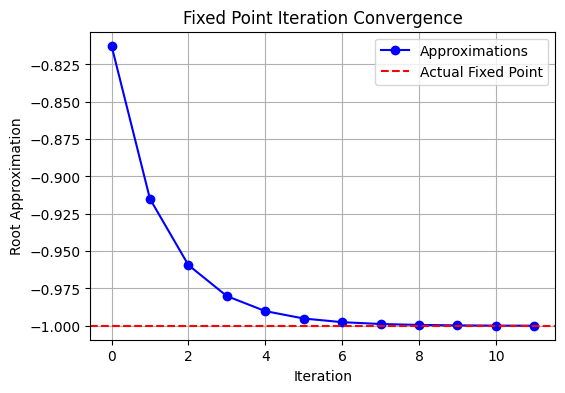

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define our function
def f(x):
    return x**2 + 3  # This function is derived from g(x) to check convergence

# fixed-point iteration function
def g(x):
    return -(x**2 + 3) / 4

# Fixed-point iteration method
def fixed_point_iteration(x0, tol=1.e-6, max_iterations=12):
    fix = []  # Initialize list to store approximations
    x = x0    # Starting point

    for i in range(max_iterations):
        x = g(x)
        fix.append(x)

        # Check if the value is within the tolerance
        if abs(f(x)) < tol:
            break

    return x, fix

# Initial guess
x0 = -0.5
tolerance = 1.e-6

# Perform Fixed-point iteration
root, fix = fixed_point_iteration(x0, tol=tolerance)

# Results
N = len(fix)

print('Fixed Point: x = %.6f' % root)
print('N = %.f' % N)

# Plotting the results
plt.figure(figsize=(6, 4))
plt.plot(fix, marker='o', linestyle='-', color='b', label='Approximations')
plt.axhline(y=-1, color='red', linestyle='--', label='Actual Fixed Point')
plt.xlabel('Iteration')
plt.ylabel('Root Approximation')
plt.title('Fixed Point Iteration Convergence')
plt.legend()
plt.grid(True)
plt.show()


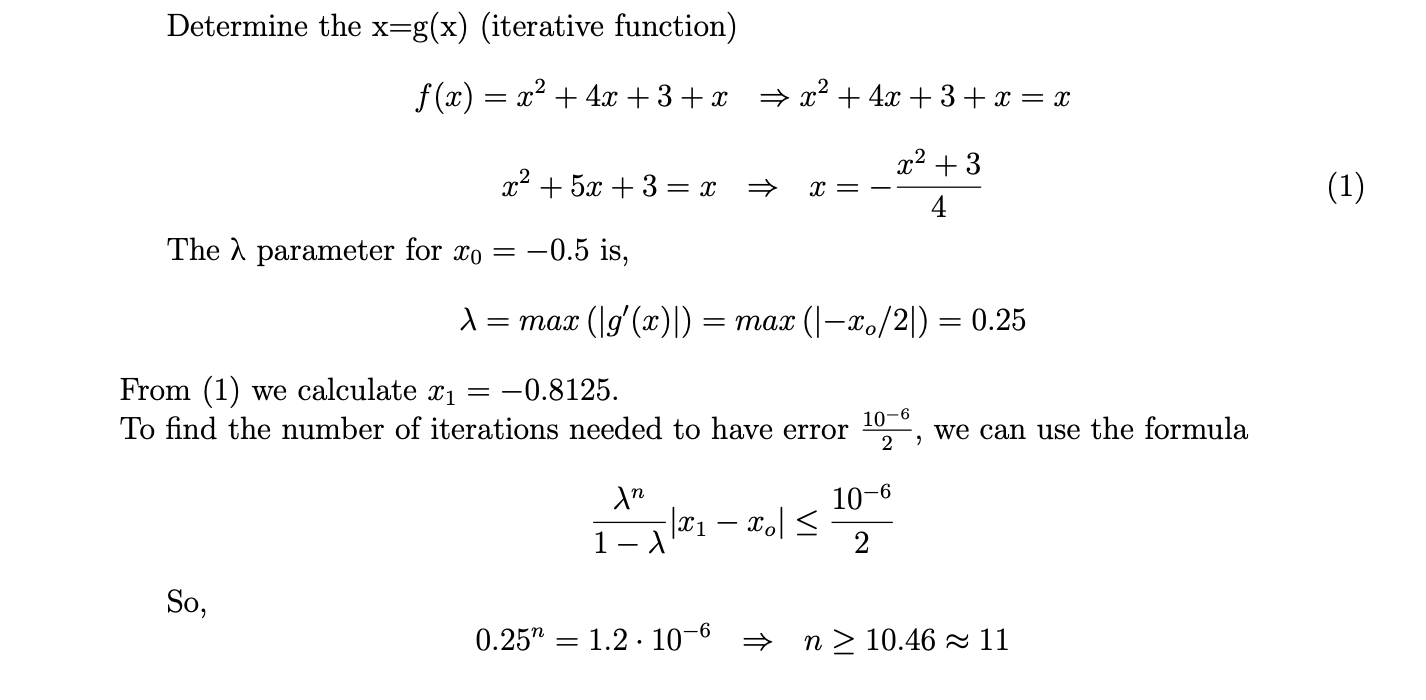

# 3.3

In [25]:
def V(r):
    return 4 * ((1 / r)**12 - (1 / r)**6) - 3

def dV(r):
    return (24 / r**7) - (48 / r**13)

# Initial guess
r = 1
tolerance = 1.e-6
max_iterations = 100

for i in range(max_iterations):
    r -= V(r) / dV(r)

    # Check for convergence
    if abs(V(r)) <= tolerance:
        break

    # Check for out-of-bounds
    if r <= 0 or r >= 10:
        print('Out of range [0, 10]')
        break

print(f'N = {i + 1} : r = {r:.6f}')


N = 6 : r = 0.934655
